# Sakila Sample

### Step 1: Import Libraries

In [1]:
import sqlite3
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load and Read Data

In [2]:
# Specify the path to the ZIP file and the extracted database file
zip_file_path = 'Sakila_Sample.zip'
extracted_db_name = 'sakila.db'  # This is the database file inside the ZIP

# Extract the database file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to the current directory
    print(f"Extracted files: {zip_ref.namelist()}")

# Verify the extracted file
if not os.path.exists(extracted_db_name):
    print(f"Error: {extracted_db_name} not found after extraction!")
else:
    print(f"Database file '{extracted_db_name}' extracted successfully.")

# Connect to the SQLite database
try:
    conn = sqlite3.connect(extracted_db_name)
    print("Database connection successful.")
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")

# Helper function to run SQL queries and return results as a DataFrame
def run_query(query):
    try:
        return pd.read_sql_query(query, conn)
    except sqlite3.Error as e:
        print(f"Error executing query: {e}")

Extracted files: ['sakila.db']
Database file 'sakila.db' extracted successfully.
Database connection successful.


In [3]:
# Display all available tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = run_query(query)
print("\nAvailable tables in the Sakila Database:")
print(tables)


Available tables in the Sakila Database:
               name
0             actor
1   sqlite_sequence
2           country
3              city
4           address
5          language
6          category
7          customer
8              film
9        film_actor
10    film_category
11        film_text
12        inventory
13            staff
14            store
15          payment
16           rental


In [4]:
# Inspect the schema of a sample table (e.g., customer)
if 'customer' in tables.values:
    query = "PRAGMA table_info(customer);"
    customer_schema = run_query(query)
    print("\nSchema for the 'customer' table:")
    print(customer_schema)

    # Display sample data from the 'customer' table
    query = "SELECT * FROM customer LIMIT 5;"
    customer_sample = run_query(query)
    print("\nSample data from the 'customer' table:")
    print(customer_sample)
else:
    print("\nTable 'customer' not found in the database.")


Schema for the 'customer' table:
   cid         name         type  notnull dflt_value  pk
0    0  customer_id          INT        1       None   1
1    1     store_id          INT        1       None   0
2    2   first_name  VARCHAR(45)        1       None   0
3    3    last_name  VARCHAR(45)        1       None   0
4    4        email  VARCHAR(50)        0       NULL   0
5    5   address_id          INT        1       None   0
6    6       active      CHAR(1)        1        'Y'   0
7    7  create_date    TIMESTAMP        1       None   0
8    8  last_update    TIMESTAMP        1       None   0

Sample data from the 'customer' table:
   customer_id  store_id first_name last_name  \
0            1         1       MARY     SMITH   
1            2         1   PATRICIA   JOHNSON   
2            3         1      LINDA  WILLIAMS   
3            4         2    BARBARA     JONES   
4            5         1  ELIZABETH     BROWN   

                                 email  address_id active  \


In [5]:
# List all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = run_query(query)
print("\nAvailable tables in the Sakila Database:")
print(tables)


Available tables in the Sakila Database:
               name
0             actor
1   sqlite_sequence
2           country
3              city
4           address
5          language
6          category
7          customer
8              film
9        film_actor
10    film_category
11        film_text
12        inventory
13            staff
14            store
15          payment
16           rental


In [6]:
# Check the schema for a specific table (e.g., 'customer')
query = "PRAGMA table_info(customer);"
customer_schema = run_query(query)
print("\nSchema for the 'customer' table:")
print(customer_schema)


Schema for the 'customer' table:
   cid         name         type  notnull dflt_value  pk
0    0  customer_id          INT        1       None   1
1    1     store_id          INT        1       None   0
2    2   first_name  VARCHAR(45)        1       None   0
3    3    last_name  VARCHAR(45)        1       None   0
4    4        email  VARCHAR(50)        0       NULL   0
5    5   address_id          INT        1       None   0
6    6       active      CHAR(1)        1        'Y'   0
7    7  create_date    TIMESTAMP        1       None   0
8    8  last_update    TIMESTAMP        1       None   0


In [7]:
# Display sample data from the 'customer' table
query = "SELECT * FROM customer LIMIT 5;"
customer_sample = run_query(query)
print("\nSample data from the 'customer' table:")
print(customer_sample)


Sample data from the 'customer' table:
   customer_id  store_id first_name last_name  \
0            1         1       MARY     SMITH   
1            2         1   PATRICIA   JOHNSON   
2            3         1      LINDA  WILLIAMS   
3            4         2    BARBARA     JONES   
4            5         1  ELIZABETH     BROWN   

                                 email  address_id active  \
0        MARY.SMITH@sakilacustomer.org           5      1   
1  PATRICIA.JOHNSON@sakilacustomer.org           6      1   
2    LINDA.WILLIAMS@sakilacustomer.org           7      1   
3     BARBARA.JONES@sakilacustomer.org           8      1   
4   ELIZABETH.BROWN@sakilacustomer.org           9      1   

               create_date          last_update  
0  2006-02-14 22:04:36.000  2019-04-11 18:11:49  
1  2006-02-14 22:04:36.000  2019-04-11 18:11:49  
2  2006-02-14 22:04:36.000  2019-04-11 18:11:49  
3  2006-02-14 22:04:36.000  2019-04-11 18:11:49  
4  2006-02-14 22:04:36.000  2019-04-11 18:11:49 

### Step 3: SQL Queries and Analysis

In [9]:
# 1. Top 5 Movies by Rentals
query = """
SELECT f.title AS MovieTitle, COUNT(r.rental_id) AS RentalCount
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY f.title
ORDER BY RentalCount DESC
LIMIT 5;
"""
top_rented_movies = run_query(query)
print("\nTop 5 Movies by Rentals:")
print(top_rented_movies)

# 2. Top 10 Movies by Revenue
query = """
SELECT f.title AS MovieTitle, SUM(p.amount) AS Revenue
FROM payment p
JOIN rental r ON p.rental_id = r.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY f.title
ORDER BY Revenue DESC
LIMIT 10;
"""
top_movies_by_revenue = run_query(query)
print("\nTop 10 Movies by Revenue:")
print(top_movies_by_revenue)

# 3. Top 5 Customers by Rentals
query = """
SELECT c.first_name || ' ' || c.last_name AS CustomerName, COUNT(r.rental_id) AS RentalCount
FROM customer c
JOIN rental r ON c.customer_id = r.customer_id
GROUP BY CustomerName
ORDER BY RentalCount DESC
LIMIT 5;
"""
top_customers = run_query(query)
print("\nTop 5 Customers by Rentals:")
print(top_customers)


Top 5 Movies by Rentals:
            MovieTitle  RentalCount
0   BUCKET BROTHERHOOD           34
1     ROCKETEER MOTHER           33
2        SCALAWAG DUCK           32
3  RIDGEMONT SUBMARINE           32
4       JUGGLER HARDLY           32

Top 10 Movies by Revenue:
          MovieTitle  Revenue
0   TELEGRAPH VOYAGE   231.73
1          WIFE TURN   223.69
2          ZORRO ARK   214.69
3  GOODFELLAS SALUTE   209.69
4     SATURDAY LAMBS   204.72
5        TITANS JERK   201.71
6       TORQUE BOUND   198.72
7        HARRY IDAHO   195.70
8     INNOCENT USUAL   191.74
9      HUSTLER PARTY   190.78

Top 5 Customers by Rentals:
    CustomerName  RentalCount
0   ELEANOR HUNT           46
1      KARL SEAL           45
2    MARCIA DEAN           42
3     CLARA SHAW           42
4  TAMMY SANDERS           41


In [10]:
# 4. Inventory Count by Category
query = """
SELECT c.name AS CategoryName, COUNT(i.inventory_id) AS InventoryCount
FROM inventory i
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY CategoryName
ORDER BY InventoryCount DESC;
"""
inventory_by_category = run_query(query)
print("\nInventory Count by Category:")
print(inventory_by_category)



Inventory Count by Category:
   CategoryName  InventoryCount
0        Sports             344
1     Animation             335
2        Sci-Fi             312
3        Action             312
4        Family             310
5       Foreign             300
6         Drama             300
7   Documentary             294
8         Games             276
9           New             275
10     Classics             270
11       Comedy             269
12     Children             269
13       Horror             248
14       Travel             235
15        Music             232


### Step 4: Visualize the Results

C:\Users\milto\AppData\Local\Temp\ipykernel_16624\897207544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies_by_revenue, x='Revenue', y='MovieTitle', palette='viridis')


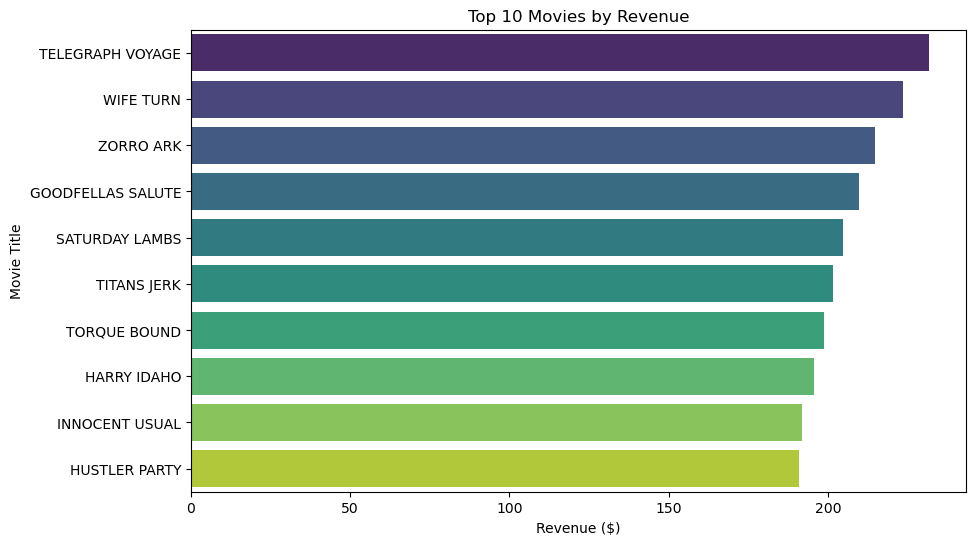

C:\Users\milto\AppData\Local\Temp\ipykernel_16624\897207544.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=inventory_by_category, x='InventoryCount', y='CategoryName', palette='coolwarm')


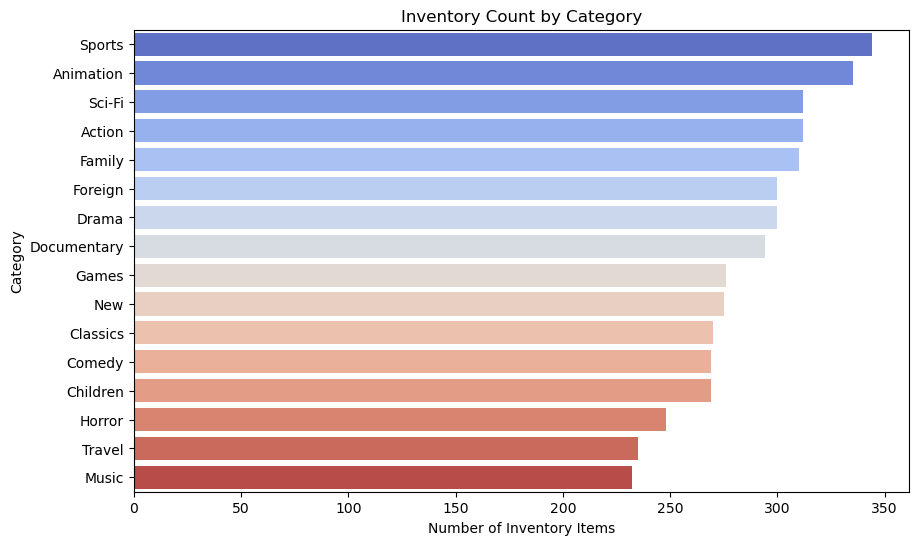

In [11]:
# Plot: Top 10 Movies by Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies_by_revenue, x='Revenue', y='MovieTitle', palette='viridis')
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Movie Title')
plt.show()

# Plot: Inventory Count by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=inventory_by_category, x='InventoryCount', y='CategoryName', palette='coolwarm')
plt.title('Inventory Count by Category')
plt.xlabel('Number of Inventory Items')
plt.ylabel('Category')
plt.show()


### Step 5: Advanced Queries


Rentals Over Time:
    RentalDate  RentalCount
0   2005-05-24            8
1   2005-05-25          137
2   2005-05-26          174
3   2005-05-27          166
4   2005-05-28          196
5   2005-05-29          154
6   2005-05-30          158
7   2005-05-31          163
8   2005-06-14           16
9   2005-06-15          348
10  2005-06-16          324
11  2005-06-17          325
12  2005-06-18          344
13  2005-06-19          348
14  2005-06-20          331
15  2005-06-21          275
16  2005-07-05           27
17  2005-07-06          504
18  2005-07-07          461
19  2005-07-08          512
20  2005-07-09          513
21  2005-07-10          480
22  2005-07-11          461
23  2005-07-12          495
24  2005-07-26           33
25  2005-07-27          649
26  2005-07-28          620
27  2005-07-29          641
28  2005-07-30          634
29  2005-07-31          679
30  2005-08-01          671
31  2005-08-02          643
32  2005-08-16           23
33  2005-08-17          593


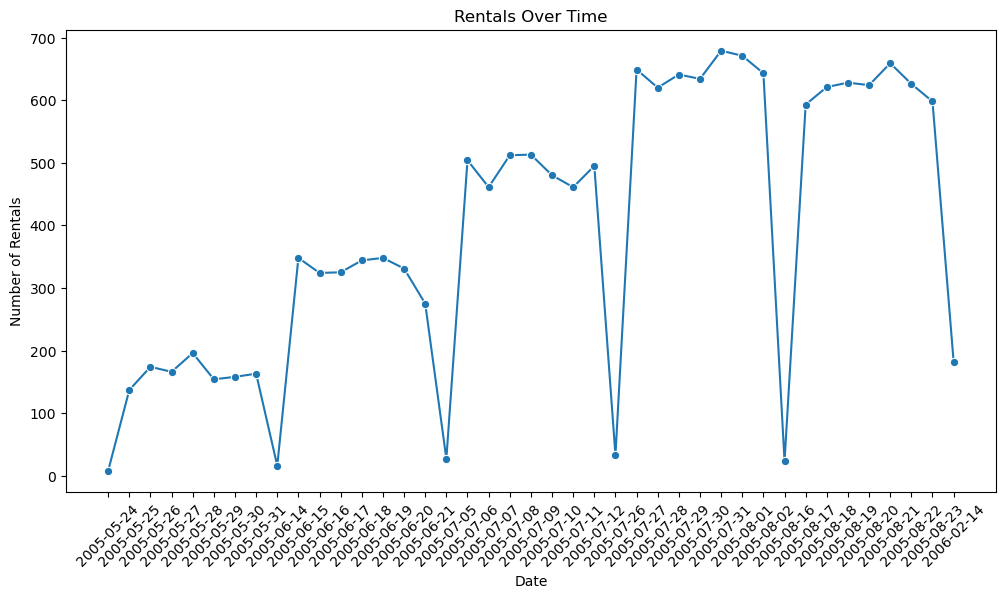


Top 5 Customers by Total Payment:
     CustomerName  TotalPayment
0       KARL SEAL        221.55
1    ELEANOR HUNT        216.54
2      CLARA SHAW        195.58
3  RHONDA KENNEDY        194.61
4   MARION SNYDER        194.61


In [12]:
# Rentals Over Time
query = """
SELECT DATE(r.rental_date) AS RentalDate, COUNT(r.rental_id) AS RentalCount
FROM rental r
GROUP BY RentalDate
ORDER BY RentalDate;
"""
rentals_over_time = run_query(query)
print("\nRentals Over Time:")
print(rentals_over_time)

# Plot: Rentals Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rentals_over_time, x='RentalDate', y='RentalCount', marker='o')
plt.title('Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.show()

# Top 5 Customers by Total Payment
query = """
SELECT c.first_name || ' ' || c.last_name AS CustomerName, SUM(p.amount) AS TotalPayment
FROM customer c
JOIN payment p ON c.customer_id = p.customer_id
GROUP BY CustomerName
ORDER BY TotalPayment DESC
LIMIT 5;
"""
top_customers_by_payment = run_query(query)
print("\nTop 5 Customers by Total Payment:")
print(top_customers_by_payment)


### Step 6: Save Key Results to CSV

In [13]:
top_rented_movies.to_csv("top_rented_movies.csv", index=False)
top_movies_by_revenue.to_csv("top_movies_by_revenue.csv", index=False)
top_customers.to_csv("top_customers_by_rentals.csv", index=False)
inventory_by_category.to_csv("inventory_by_category.csv", index=False)

print("\nKey results have been saved as CSV files.")


Key results have been saved as CSV files.
